## データを用意する

In [1]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from PIL import Image

### data_setを用意 [(入力データ, ラベル), ....,(入力データ, ラベル)] 

In [2]:
train_data = MNIST('~/images/ml_images/mnist', train=True, download=True, transform=transforms.ToTensor())
test_data = MNIST('~/images/ml_images/mnist', train=False, download=True, transform=transforms.ToTensor())
# transforms.ToTensor() について
# Convert a PIL Image or numpy.ndarray to tensor.
# Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] 
# if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8

In [7]:
# 中身をみてみるとたしかに 2次元で要素は[0~1]範囲の数値になっている ん、リストは3次元か。モノクロだからかな？？そうかも。
train_data[0][0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

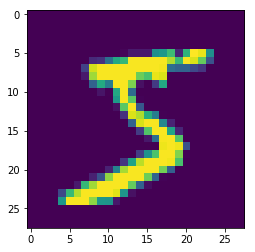

In [8]:
# 0-1の範囲だから pltでimshowをして画像化して確認してみる
# やっぱり画像のリストは3次元だった
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_data[0][0][0])

###  Data_loader を使って data_setを指定バッチごとに読み込めるようにする

In [129]:
#  train_loader を使ってバッチごとまとめて読み込む
train_loader = DataLoader(train_data, batch_size=4, shuffle=False)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False)

Label: tensor(9)


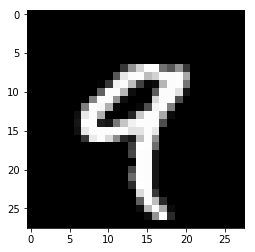

In [130]:
# 一つだけ取り出して中身をみてみる
data_iter = iter(train_loader)
images, labels = data_iter.next()
images, labels = data_iter.next()

# matplotlibで1つ目のデータを可視化してみる
npimg = images[0].numpy()
npimg = npimg.reshape((28, 28))
plt.imshow(npimg, cmap='gray')
print('Label:', labels[0])

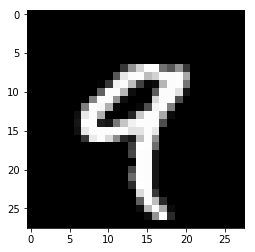

In [36]:
plt.imshow(images[0][0], cmap='gray')

In [37]:
# データの形を確認する
# 4つのバッチごとにセットになっている
j = 0
for i in train_loader:
    print(i[0].size())
    print(i[0].view(-1, 28*28).size())
    print(i[0].view(-1, 28*28))
#     print(i)
    j += 1
    if j == 2:
        break

torch.Size([4, 1, 28, 28])
torch.Size([4, 784])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([4, 1, 28, 28])
torch.Size([4, 784])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


## NNのモデルを定義する

### モデルのクラスを定義

In [131]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F  # これつかってなくない？？

# nn.Module: Base class for all neural network modules.
# Your models should also subclass this class.
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # nn.Linear Applies a linear transformation to the incoming data: y = xA^T + b
        self.l1 = nn.Linear(28 * 28, 50) # 入力層から隠れ層へ
        self.l2 = nn.Linear(50, 10) # 隠れ層から出力層へ
        
    def forward(self, x):
        # view は　"Returns a new tensor with the same data as the self tensor but of a different shape."
        # -1はいいように推測してくれるという意味
        x = x.view(-1, 28 * 28) # テンソルのリサイズ: (N, 1, 28, 28) --> (N, 784)
        x = self.l1(x)
        x = self.l2(x)
        return x
    
net = Net()

### nn.Liner層の働きの確認

In [132]:
# nn.Liner example
m = nn.Linear(2, 3)
input = torch.randn(5, 2)
print('---------- Input data ----------')
print(input.size())
print(input)
output = m(input)
print('---------- output data ----------')
print(output.size())
print(output)

---------- Input data ----------
torch.Size([5, 2])
tensor([[ 1.8041,  1.4401],
        [ 0.3086,  0.0552],
        [ 2.0938,  0.8977],
        [-0.8610, -1.2958],
        [ 0.9452, -1.1976]])
---------- output data ----------
torch.Size([5, 3])
tensor([[-0.0772,  1.5103, -1.3282],
        [ 0.3034,  0.7916, -0.1832],
        [ 0.1271,  1.8306, -1.2471],
        [ 0.6930,  0.2894,  0.8125],
        [ 0.7733,  1.5090,  0.0178]], grad_fn=<AddmmBackward>)


## コスト関数と最適化手法の定義

In [133]:
# コスト関数と最適化手法を定義
import torch.optim as optim

# This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

### コスト関数のCrosEntropyLoss()


#### CrosEntropyLossの計算式の確認
The loss can be described as:

$
        \text{loss}(x, class) = -\log\left(\frac{\exp(x[class])}{\sum_j \exp(x[j])}\right)
                       = -x[class] + \log\left(\sum_j \exp(x[j])\right)
$

#### LogSoftmaxの計算式の確認
Applies the $\log(\text{Softmax}(x))$ function to an n-dimensional
    input Tensor. The LogSoftmax formulation can be simplified as:

$
\text{LogSoftmax}(x_{i}) = \log\left(\frac{\exp(x_i) }{ \sum_j \exp(x_j)} \right)
$

In [86]:
m = nn.LogSoftmax()
input = torch.randn(2, 3)
print(input)
output = m(input)
print(output)

# ええと確認してみるか

tensor([[-0.6472, -0.2271, -0.0744],
        [-0.7669,  1.3740,  0.0398]])
tensor([[-1.4575, -1.0374, -0.8848],
        [-2.4636, -0.3228, -1.6569]])


/Users/kapi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


In [90]:
# おお、こんな便利なものがある
input.exp()
# こっちでもいいらしい
# torch.exp(input)

tensor([[0.5235, 0.7968, 0.9283],
        [0.4645, 3.9509, 1.0406]])

In [102]:
# やっぱりこういうのあるよね、そりゃ
torch.sum( input, 1)

tensor([-0.9487,  0.6469])

## 学習の実行

1. 入力をtorch.autograd.Variableに変換
2. 逆伝播で使う勾配情報をリセット
3. 順伝播
4. ロスの計算
5. 逆伝播
6. 得られた勾配を使ってパラメータを更新

[JupyterまたはiPython Notebookでデバッグをする方法 \- Qiita](https://qiita.com/makopo/items/170c939c79dcc5c89e12)


In [134]:

for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # バッチサイズごとに処理をする 今は4にした
        inputs, labels = data
        
        # Variableに変換 これ何しているのか？？
        # もうこれdeprecatedになっている
#         inputs, labels = Variable(inputs), Variable(labels)
#         from IPython.core.debugger import Pdb; Pdb().set_trace()

        # 勾配情報をリセット
        optimizer.zero_grad()
        
        # 順伝播
        outputs = net(inputs)
        
        # コスト関数を使ってロスを計算する
        loss = criterion(outputs, labels)
        
        # 逆伝播 ここで、微分係数を計算している?
        # ええと、もう一度NNのアルゴリズムのところ見直そう、、
        loss.backward()
        
        # パラメータの更新
        optimizer.step()
        
        running_loss += loss.data.item()
        
        # 60000データあるので、15000回で全部のデータをまわしたことになる
        if i % 1000 == 999:
            print('%d %d loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
print('Finished Training')

1 1000 loss: 1.056
1 2000 loss: 0.452
1 3000 loss: 0.389
1 4000 loss: 0.427
1 5000 loss: 0.340
1 6000 loss: 0.341
1 7000 loss: 0.336
1 8000 loss: 0.376
1 9000 loss: 0.310
1 10000 loss: 0.337
1 11000 loss: 0.328
1 12000 loss: 0.341
1 13000 loss: 0.317
1 14000 loss: 0.320
1 15000 loss: 0.231
2 1000 loss: 0.289
2 2000 loss: 0.287
2 3000 loss: 0.298
2 4000 loss: 0.351
2 5000 loss: 0.274
2 6000 loss: 0.301
2 7000 loss: 0.296
2 8000 loss: 0.329
2 9000 loss: 0.277
2 10000 loss: 0.314
2 11000 loss: 0.304
2 12000 loss: 0.315
2 13000 loss: 0.296
2 14000 loss: 0.300
2 15000 loss: 0.214
3 1000 loss: 0.275
3 2000 loss: 0.273
3 3000 loss: 0.281
3 4000 loss: 0.337
3 5000 loss: 0.261
3 6000 loss: 0.291
3 7000 loss: 0.285
3 8000 loss: 0.313
3 9000 loss: 0.267
3 10000 loss: 0.305
3 11000 loss: 0.295
3 12000 loss: 0.305
3 13000 loss: 0.287
3 14000 loss: 0.290
3 15000 loss: 0.206
Finished Training


In [ ]:
# backwardでは何をしているのか？？
# ネットワークなくても、backwardできているんだけど、どういうことなん？
# 変数を保持しているということ？？
# うん、nnはただのモジュールだから

In [140]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
input = torch.randn(3, 5, requires_grad=False)
print(input)
target = torch.empty(3, dtype=torch.long).random_(5)
print(target)
output = loss(input, target)
print(output)
output.backward()
print(output)

tensor([[ 1.5090, -0.3406, -0.9058,  0.5428,  0.6961],
        [-1.3489, -0.9710,  0.3438, -1.0301, -0.3680],
        [-0.2126, -0.2919,  0.9350,  1.4719, -0.4875]])
tensor([1, 4, 0])
tensor(2.1648)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [105]:
torch.randn(2, 1)

tensor([[ 0.5202],
        [-0.6813]])

In [109]:
torch.tensor([[2], [10]])

tensor([[ 2],
        [10]])

In [110]:
input

tensor([[-0.6472, -0.2271, -0.0744],
        [-0.7669,  1.3740,  0.0398]])

In [112]:
# なるほど。やっぱりこういうことできるんだな！！
input/torch.tensor([[2.], [10.]])

tensor([[-0.3236, -0.1136, -0.0372],
        [-0.0767,  0.1374,  0.0040]])

In [84]:
loss = nn.CrossEntropyLoss()
sm = nn.LogSoftmax() 

input = torch.randn(3, 5, requires_grad=True)
print(input)
target = torch.empty(3, dtype=torch.long).random_(5)
print(target)

out1 = sm(input)
print("softmax", out1)

output = loss(input, target)
output.backward()

tensor([[-0.1615,  0.1687, -0.0254,  0.1288, -1.2359],
        [-0.3305, -0.2392,  1.3431, -0.6825,  0.1191],
        [ 0.0048, -0.9204,  1.1814, -0.3697, -0.2038]], requires_grad=True)
tensor([0, 1, 1])
softmax tensor([[-1.6516, -1.3214, -1.5155, -1.3613, -2.7260],
        [-2.2719, -2.1806, -0.5983, -2.6238, -1.8223],
        [-1.8147, -2.7399, -0.6381, -2.1892, -2.0233]],
       grad_fn=<LogSoftmaxBackward>)
tensor(2.1907, grad_fn=<NllLossBackward>)
tensor(2.1907, grad_fn=<NllLossBackward>)


/Users/kapi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


## 結果の確認

In [135]:
import torch

correct = 0
total = 0
for data in test_loader:
    inputs, labels = data
    outputs = net(Variable(inputs))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy %d / %d = %f' % (correct, total, correct / total))

Accuracy 9113 / 10000 = 0.000000


Label: tensor(7)


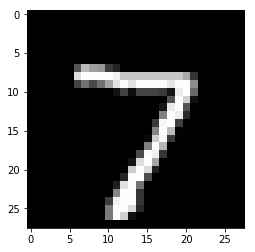

In [52]:
test_iter = iter(test_loader)

inputs, labels = test_iter.next()
outputs = net(Variable(inputs))
_, predicted = torch.max(outputs.data, 1)

plt.imshow(inputs[0].numpy().reshape(28, 28), cmap='gray')
print('Label:', predicted[0])